In [3]:
import glob
import numpy as np
from PIL import *
import PIL.Image

In [4]:
filelist = glob.glob('normalized/glu/*.jpg')              #change '/'
glu = np.array([np.array(Image.open(fname)) for fname in filelist])
print(glu.shape)

(40, 597, 597, 3)


In [5]:
filelist = glob.glob('normalized/nglu/*.jpg')         #change '/'
nonglu = np.array([np.array(Image.open(fname)) for fname in filelist])
print(nonglu.shape)

(50, 597, 597, 3)


In [6]:
X = np.concatenate((glu,nonglu),axis=0)
print(X.shape)
print(X[1,:].shape)

(90, 597, 597, 3)
(597, 597, 3)


In [7]:
gluL = np.array([1 for i in range(40)])
nongluL = np.array([0 for i in range(50)])
y = np.concatenate((gluL,nongluL),axis=0)
print(y.shape)

(90,)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(y_test)

(72, 597, 597, 3) (18, 597, 597, 3) (72,) (18,)
[0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1]


In [9]:
from keras.models import Sequential
from keras.layers import Activation, Conv2D, MaxPooling2D, Flatten, Dropout,Dense,LeakyReLU
from keras.layers.core import Activation, Dense
model = Sequential()

model.add(Conv2D(32, (5,5), padding='same', input_shape=X_train.shape[1:]))
# model.add(Activation('sigmoid'))
model.add(LeakyReLU(alpha=0.1))
# model.add(Dropout(0.02))
model.add(Conv2D(32, (3,3),padding='valid'))
# model.add(Activation('sigmoid'))
model.add(LeakyReLU(alpha=0.1))
# model.add(Dropout(0.02))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3)))
# model.add(Activation('sigmoid'))
model.add(LeakyReLU(alpha=0.1))
# model.add(Dropout(0.02))
model.add(Conv2D(64, (3,3)))
# model.add(Activation('sigmoid'))
model.add(LeakyReLU(alpha=0.1))
# model.add(Dropout(0.04))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
# model.add(Activation('sigmoid'))
model.add(LeakyReLU(alpha=0.1))
# model.add(Dropout(0.04))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3)))
# model.add(Activation('sigmoid'))
model.add(LeakyReLU(alpha=0.1))
# model.add(Dropout(0.08))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3)))
# model.add(Activation('sigmoid'))
model.add(LeakyReLU(alpha=0.1))
# model.add(Dropout(0.08))
model.add(Conv2D(128, (3,3)))
# model.add(Activation('sigmoid'))
model.add(LeakyReLU(alpha=0.1))
# model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3)))
# model.add(Activation('sigmoid'))
model.add(LeakyReLU(alpha=0.1))
# model.add(Dropout(0.1))
model.add(Conv2D(256, (3,3)))
# model.add(Activation('sigmoid'))
model.add(LeakyReLU(alpha=0.1))
# model.add(Dropout(0.20))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, (1,1)))
# model.add(Activation('sigmoid'))
model.add(LeakyReLU(alpha=0.1))
# model.add(Dropout(0.10))

model.add(Flatten())
model.add(Dense(64))
# model.add(Activation('sigmoid'))
model.add(LeakyReLU(alpha=0.1))
# model.add(Dropout(0.3))
model.add(Dense(16))
# model.add(Activation('sigmoid'))
model.add(LeakyReLU(alpha=0.1))
# model.add(Dropout(0.10))
model.add(Dense(2, activation='sigmoid'))

/home/subodh_pushkar/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [10]:
model.output_shape

(None, 2)

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 597, 597, 32)      2432      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 597, 597, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 595, 595, 32)      9248      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 595, 595, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 297, 297, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 295, 295, 32)      9248      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 295, 295, 32)      0         
__________

# DATA GENERATION

In [12]:
from keras.utils import np_utils
# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')
num_classes = 2
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator

datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True,
                             rotation_range=15, width_shift_range=0.1,
                             height_shift_range=0.1,zoom_range=0.1,
                             fill_mode='constant', cval=0.0)

datagen.fit(X_train)
print(y_train[0])



[1. 0.]


In [13]:
from keras.optimizers import *

from keras import optimizers
# sgd = optimizers.SGD(lr=0.0003, decay=1e-6, momentum=0.9, nesterov=True)
# model.compile(loss='mean_squared_error', optimizer=sgd, metrics = ['accuracy'])
opt = Adam(lr=0.01)

# model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# EPOCHS = 100
# INIT_LR = 1e-4
# BS = 32
# opt = Adam(lr=INIT_LR)
model.compile(optimizer=SGD(0.005),loss="binary_crossentropy",metrics=["accuracy"])
# model.compile(loss='binary_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])
# train the network

In [14]:

print("[INFO] training network...")
H = model.fit_generator(datagen.flow(X_train, y_train, batch_size=1),
                        validation_data=(X_test, y_test), steps_per_epoch=len(X_train), epochs=100, verbose=1)

# model.fit(datagen.flow(X_train, y_train, batch_size=32),steps_per_epoch=len(X_train) / 32, epochs=10,validation_data=(X_test, y_test))

[INFO] training network...
Epoch 1/100
72/72 [==============================] - 151s 2s/step - loss: 0.6986 - acc: 0.5069 - val_loss: 0.7083 - val_acc: 0.4444
Epoch 2/100
72/72 [==============================] - 165s 2s/step - loss: 0.6928 - acc: 0.5764 - val_loss: 0.7022 - val_acc: 0.4444
Epoch 3/100
72/72 [==============================] - 165s 2s/step - loss: 0.6955 - acc: 0.5972 - val_loss: 0.7011 - val_acc: 0.4444
Epoch 4/100
72/72 [==============================] - 164s 2s/step - loss: 0.6925 - acc: 0.5625 - val_loss: 0.6970 - val_acc: 0.4444
Epoch 5/100
72/72 [==============================] - 164s 2s/step - loss: 0.6896 - acc: 0.5833 - val_loss: 0.6916 - val_acc: 0.4444
Epoch 6/100
72/72 [==============================] - 165s 2s/step - loss: 0.6865 - acc: 0.5903 - val_loss: 0.6951 - val_acc: 0.4444
Epoch 7/100
72/72 [==============================] - 164s 2s/step - loss: 0.6896 - acc: 0.5833 - val_loss: 0.7000 - val_acc: 0.4444
Epoch 8/100
72/72 [==============================

72/72 [==============================] - 108s 2s/step - loss: 0.6732 - acc: 0.6389 - val_loss: 0.6543 - val_acc: 0.6389
Epoch 63/100
72/72 [==============================] - 108s 2s/step - loss: 0.6287 - acc: 0.6667 - val_loss: 0.6767 - val_acc: 0.5833
Epoch 64/100
72/72 [==============================] - 109s 2s/step - loss: 0.6330 - acc: 0.6875 - val_loss: 0.4852 - val_acc: 0.8056
Epoch 65/100
72/72 [==============================] - 108s 1s/step - loss: 0.5874 - acc: 0.7500 - val_loss: 0.5560 - val_acc: 0.7500
Epoch 66/100
72/72 [==============================] - 108s 2s/step - loss: 0.5531 - acc: 0.6806 - val_loss: 0.5925 - val_acc: 0.7500
Epoch 67/100
72/72 [==============================] - 108s 2s/step - loss: 0.5966 - acc: 0.7361 - val_loss: 0.5924 - val_acc: 0.7500
Epoch 68/100
72/72 [==============================] - 108s 2s/step - loss: 0.5877 - acc: 0.7569 - val_loss: 0.5278 - val_acc: 0.7222
Epoch 69/100
72/72 [==============================] - 108s 2s/step - loss: 0.5626 

In [15]:
from keras.models import load_model

# Creates a HDF5 file 'my_model.h5'
model.save('third_model.h5')

# Deletes the existing model
del model  

# Returns a compiled model identical to the previous one
model = load_model('third_model.h5')

In [16]:
import matplotlib.pyplot as plt
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Training for ' +str(100)+ ' epochs')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

<Figure size 640x480 with 1 Axes>

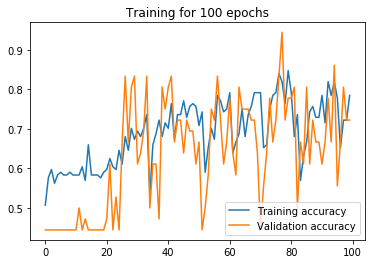

In [17]:
plt.plot(H.history['acc'])
plt.plot(H.history['val_acc'])
plt.title('Training for ' +str(100)+ ' epochs')
plt.legend(['Training accuracy', 'Validation accuracy'], loc='lower right')
plt.show()

In [18]:
score = model.evaluate(X_test, y_test, batch_size=1)
print(score)

18/18 [==============================] - 7s 386ms/step
[0.42238644972854267, 0.7222222222222222]


In [33]:
from PIL import Image
import os
def load_images_from_folder(folder):
    images = []
    images_idx = []
    for filename in os.listdir(folder):
        img = np.asarray(Image.open(os.path.join(folder,filename)))
        images.append(img)
        images_idx.append(filename)
    return images, images_idx
    
img , img_idx = load_images_from_folder('normalized/test/')
test = np.asarray(img)
print(test.shape)
# print(img_idx)
for i in range(400):
    print(img_idx[i][:5] + '.jpg')
# A=np.asarray(img)

(400, 597, 597, 3)
V0060.jpg
V0265.jpg
V0109.jpg
V0210.jpg
V0225.jpg
V0303.jpg
V0268.jpg
V0289.jpg
V0319.jpg
V0089.jpg
V0180.jpg
V0113.jpg
V0372.jpg
V0360.jpg
V0313.jpg
V0166.jpg
V0211.jpg
V0361.jpg
V0162.jpg
V0078.jpg
V0080.jpg
V0061.jpg
V0164.jpg
V0366.jpg
V0178.jpg
V0248.jpg
V0156.jpg
V0163.jpg
V0065.jpg
V0150.jpg
V0188.jpg
V0306.jpg
V0341.jpg
V0328.jpg
V0218.jpg
V0347.jpg
V0041.jpg
V0250.jpg
V0122.jpg
V0224.jpg
V0264.jpg
V0354.jpg
V0013.jpg
V0014.jpg
V0129.jpg
V0279.jpg
V0280.jpg
V0009.jpg
V0307.jpg
V0345.jpg
V0119.jpg
V0392.jpg
V0111.jpg
V0189.jpg
V0181.jpg
V0376.jpg
V0136.jpg
V0324.jpg
V0369.jpg
V0281.jpg
V0338.jpg
V0147.jpg
V0075.jpg
V0171.jpg
V0121.jpg
V0011.jpg
V0312.jpg
V0046.jpg
V0322.jpg
V0117.jpg
V0024.jpg
V0380.jpg
V0095.jpg
V0216.jpg
V0244.jpg
V0059.jpg
V0274.jpg
V0058.jpg
V0237.jpg
V0351.jpg
V0175.jpg
V0370.jpg
V0120.jpg
V0327.jpg
V0390.jpg
V0393.jpg
V0064.jpg
V0040.jpg
V0037.jpg
V0229.jpg
V0362.jpg
V0400.jpg
V0287.jpg
V0056.jpg
V0115.jpg
V0079.jpg
V0299.jpg
V0202.jpg
V

In [21]:
# test_datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True)

In [20]:
ans = model.predict(test, batch_size=1)
print(ans)
# model.predict_classes(test,batch_size=1)

[[8.96741152e-01 1.55477941e-01]
 [4.19696182e-01 6.18145227e-01]
 [8.31555247e-01 2.19316453e-01]
 [8.22943449e-01 2.28321180e-01]
 [7.03641593e-01 4.58464086e-01]
 [9.33934808e-01 8.84845629e-02]
 [3.27014029e-01 6.80855513e-01]
 [8.31603289e-01 2.55139172e-01]
 [2.27225330e-02 9.82460141e-01]
 [1.43635105e-02 9.81262147e-01]
 [8.98456991e-01 1.38490766e-01]
 [7.94796169e-01 4.07416582e-01]
 [8.32485139e-01 2.40376905e-01]
 [8.95235658e-01 1.48307204e-01]
 [5.40490389e-01 5.94885170e-01]
 [8.99149179e-01 2.15703428e-01]
 [9.17278707e-01 1.26450881e-01]
 [3.40189278e-01 6.62038624e-01]
 [9.04264748e-01 4.52126674e-02]
 [9.10778821e-01 2.09236816e-01]
 [9.16148782e-01 1.52591020e-01]
 [7.30089188e-01 3.60716373e-01]
 [9.83576357e-01 4.41546366e-02]
 [7.81241357e-01 3.99048984e-01]
 [9.23456848e-01 7.57796168e-02]
 [9.61529791e-01 1.37193194e-02]
 [8.10851395e-01 2.30717584e-01]
 [9.20660377e-01 1.58398449e-01]
 [9.11824226e-01 9.20241773e-02]
 [4.21503216e-01 6.70621455e-01]
 [5.514650

In [42]:
for list in ans:
    if list[1]<0.2:
        print(0.1)
        continue
    if list[1]<0.3:
        print(0.2)
        continue
    if list[1]<0.35:
        print(0.3)
        continue
    if list[1]<0.4:
        print(0.4)
        continue
    if list[1]<0.5:
        print(0.5)
        continue
    if list[1]<0.6:
        print(0.6)
        continue
    if list[1]<0.65:
        print(0.7)
        continue
    if list[1]<0.675:
        print(0.8)
        continue
    if list[1]<0.69:
        print(0.9)
        continue
    else:
        print(1.0)
        continue
        
    
    

0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7


# SVM

In [21]:
from keras.models import Model
model_feat = Model(inputs=model.input,outputs=model.get_layer('flatten_1').output)

feat_train = model_feat.predict(X_train)
print(feat_train.shape)

feat_val = model_feat.predict(X_test)
print(feat_val.shape)

feat_test = model_feat.predict(test)
print(feat_test)

(72, 6400)
(18, 6400)
[[-0.39409748 -0.24344373 -0.17552768 ... -0.06604328  0.35660142
  -0.19677499]
 [-0.2057484  -0.00174493 -0.07104918 ... -0.07811774  0.5779227
  -0.19629826]
 [-0.2445236  -0.05804935 -0.0824775  ... -0.11897849  0.5372834
  -0.23780273]
 ...
 [-0.33844307  0.18275    -0.05560327 ... -0.17903985  1.1702827
  -0.33582085]
 [-0.37631708 -0.01794819 -0.06346    ... -0.08441425  0.4090436
  -0.2271295 ]
 [-0.17838709 -0.07178196 -0.08891865 ... -0.12996171  0.6714482
  -0.11620247]]


In [22]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')

svm.fit(feat_train,np.argmax(y_train,axis=1))

print('fitting done !!!')

fitting done !!!


In [23]:
svm.score(feat_train,np.argmax(y_train,axis=1))

0.8333333333333334

In [24]:
svm.score(feat_val,np.argmax(y_test,axis=1))

0.6666666666666666

In [25]:
Pred_labels = svm.predict(feat_test)
print(Pred_labels)

[0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1
 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1
 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0
 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0
 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1]


# XGBOOST

In [26]:
import xgboost as xgb

xb = xgb.XGBClassifier()

xb.fit(feat_train,np.argmax(y_train,axis=1))

print('fitting done !!!')

fitting done !!!


In [27]:
xb.score(feat_train,np.argmax(y_train,axis=1))

/home/subodh_pushkar/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


1.0

In [28]:
xb.score(feat_val,np.argmax(y_test,axis=1))

/home/subodh_pushkar/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8333333333333334

In [30]:
Pred_labels = xb.predict_proba(feat_test)
print(Pred_labels)

[[0.45919937 0.54080063]
 [0.7172894  0.2827106 ]
 [0.84200776 0.15799224]
 [0.9183689  0.08163113]
 [0.8118193  0.18818066]
 [0.860631   0.13936898]
 [0.74175644 0.25824353]
 [0.8500467  0.14995332]
 [0.21920651 0.7807935 ]
 [0.21859485 0.78140515]
 [0.9353889  0.06461108]
 [0.85493845 0.14506154]
 [0.9037714  0.09622862]
 [0.8671173  0.13288273]
 [0.83945435 0.16054565]
 [0.8806802  0.11931977]
 [0.93739766 0.06260236]
 [0.8509294  0.14907059]
 [0.85619646 0.14380355]
 [0.85935676 0.14064322]
 [0.5352185  0.46478155]
 [0.845747   0.15425299]
 [0.91600835 0.08399164]
 [0.86492896 0.13507101]
 [0.9775467  0.02245332]
 [0.96723884 0.03276116]
 [0.9477386  0.05226142]
 [0.83945435 0.16054565]
 [0.97796553 0.02203447]
 [0.8689779  0.13102211]
 [0.8522268  0.14777322]
 [0.4248864  0.5751136 ]
 [0.86767745 0.13232252]
 [0.7931349  0.2068651 ]
 [0.8118193  0.18818066]
 [0.1303246  0.8696754 ]
 [0.0516066  0.9483934 ]
 [0.8607155  0.1392845 ]
 [0.81667864 0.18332136]
 [0.785448   0.21455197]


In [35]:
for list in Pred_labels:
    print(round(list[1],1))

0.5
0.3
0.2
0.1
0.2
0.1
0.3
0.1
0.8
0.8
0.1
0.1
0.1
0.1
0.2
0.1
0.1
0.1
0.1
0.1
0.5
0.2
0.1
0.1
0.0
0.0
0.1
0.2
0.0
0.1
0.1
0.6
0.1
0.2
0.2
0.9
0.9
0.1
0.2
0.2
0.1
0.4
0.6
1.0
0.1
0.1
0.2
0.1
0.2
0.2
0.2
0.9
0.0
0.2
1.0
0.1
0.2
0.1
0.2
0.1
0.7
0.2
1.0
0.2
1.0
0.2
0.6
1.0
0.2
0.1
0.5
0.1
0.3
0.8
0.2
1.0
0.1
0.1
0.1
1.0
1.0
0.0
0.1
0.2
0.3
0.8
0.4
0.1
0.7
0.6
0.1
0.2
0.1
0.1
0.4
0.1
0.1
0.2
1.0
0.1
0.1
0.1
0.2
0.1
0.5
0.1
0.5
0.1
0.7
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.5
0.2
0.0
0.1
0.2
1.0
1.0
0.2
0.1
0.1
0.2
0.1
1.0
0.1
0.9
0.2
0.9
0.1
1.0
0.1
0.3
0.1
0.7
0.1
0.6
0.2
0.1
0.1
1.0
0.5
0.1
1.0
0.1
0.3
0.2
0.1
0.2
1.0
0.1
0.5
0.5
1.0
0.6
0.1
0.1
0.2
0.1
0.2
0.1
0.1
0.0
0.1
0.2
0.1
0.1
0.6
0.1
0.0
0.1
0.7
0.6
0.7
0.5
0.1
0.2
0.3
0.4
0.2
0.1
0.0
0.1
0.2
1.0
0.1
0.3
1.0
1.0
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
1.0
0.1
0.1
0.4
0.2
0.1
0.1
0.7
0.1
0.2
0.7
0.2
0.2
0.0
0.1
0.1
0.1
0.2
0.3
0.1
1.0
0.1
0.6
0.1
1.0
0.1
0.2
0.1
0.9
0.2
0.1
0.3
0.9
0.1
0.1
0.1
0.1
0.2
0.1
0.1
0.4
0.2
1.0
0.1
0.1
0.1
0.1
0.2
